In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
%matplotlib inline
#print(cv2.RETR_TREE)
#print(cv2.RETR_LIST)
#print(cv2.CHAIN_APPROX_NONE)
#print(cv2.CHAIN_APPROX_SIMPLE)

# Start reading images

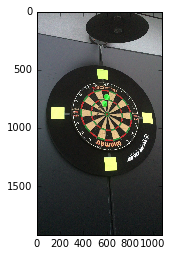

In [12]:
IM,BASE_FRAME_GRAY = Image_Tools.readImage('./images/vid2.png',(1080,1920))
IM2,BASE_FRAME_GRAY2 = Image_Tools.readImage('./images/vid3.png',(1080,1920))
GUI.imShow(IM)

# Detect dart bounding box

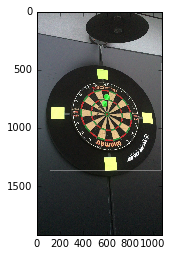

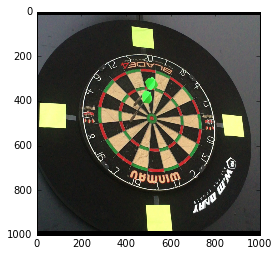

In [13]:
dartboard_detector = Dartboard_Detector()
x,y,w,h,BOARD,GREEN,RED = dartboard_detector.detectDartboard(IM)
GUI.imShow(Image_Tools.debugRectangle(IM,x,y,w,h))
IM_ROI = dartboard_detector.scaleROI(Image_Tools.getROI(IM,x,y,w,h))
IM_ROI_grey = dartboard_detector.scaleROI(Image_Tools.getROI(BASE_FRAME_GRAY,x,y,w,h)) 
IM_ROI_green = dartboard_detector.scaleROI(Image_Tools.getROI(GREEN,x,y,w,h))  
IM_ROI_red = dartboard_detector.scaleROI(Image_Tools.getROI(RED,x,y,w,h))  
IM_ROI_board = dartboard_detector.scaleROI(Image_Tools.getROI(BOARD,x,y,w,h))  
GUI.imShow(IM_ROI)

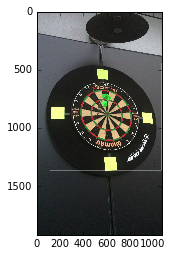

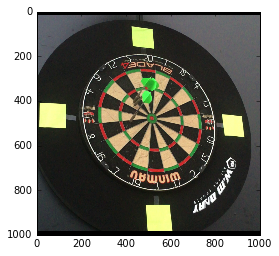

In [14]:
GUI.imShow(Image_Tools.debugRectangle(IM2,x,y,w,h))
IM_ROI2 =  dartboard_detector.scaleROI(Image_Tools.getROI(IM2,x,y,w,h))
IM_ROI2_grey =  dartboard_detector.scaleROI(Image_Tools.getROI(BASE_FRAME_GRAY2,x,y,w,h))
GUI.imShow(IM_ROI2)

# Compute differences

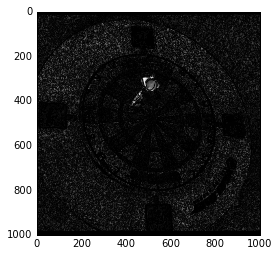

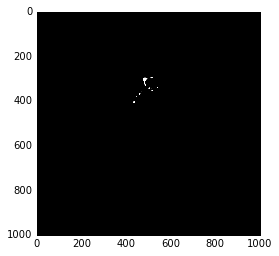

In [15]:
difference_detector = Difference_Detector()
IM_ROI_difference,IM_ROI_GRAY_NORM,IM_ROI_GRAY2_NORM,IM_ROI_GRAY_NORM_DIFF = difference_detector.computeDifference(IM_ROI_grey,IM_ROI2_grey)
GUI.imShow(IM_ROI_GRAY_NORM_DIFF)
GUI.imShow(IM_ROI_difference)

# Detect Arrow

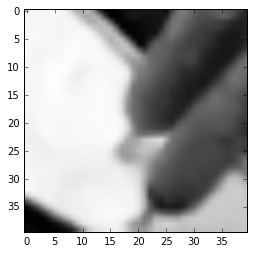

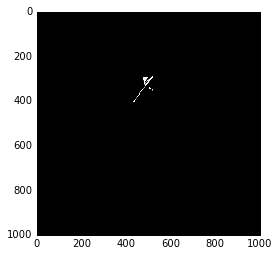

In [16]:
arrow_detector = Arrow_Detector()
IM_arrow_closed,arrow_x1,arrow_y1,xxx,yyy,www,hhh, line_image,apex_image = arrow_detector.detectArrow(IM_ROI_difference,IM_ROI2_grey)
GUI.imShow(apex_image)
GUI.imShow(IM_arrow_closed)
#GUI.imShow(Image_Tools.debugRectangle(IM_arrow_closed,xxx,yyy,www,hhh))
#print(arrow_x1)
#print(arrow_y1)

# Detect Apex

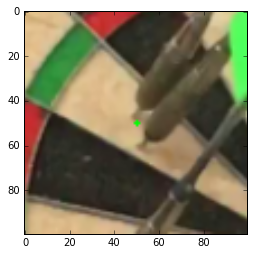

In [17]:
arrow_detector = Arrow_Detector()
#average arrows
IM_arrow_roi1 = arrow_detector.debugApex(IM_ROI2,arrow_x1,arrow_y1,(0,255,0))
GUI.imShow(IM_arrow_roi1)

cv2.imwrite("./images/_detected_dart_2xx.png",IM_arrow_roi)

# Detect Scoring zones

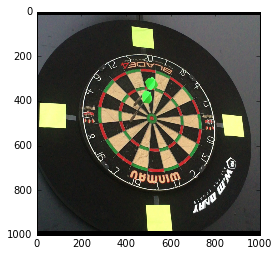

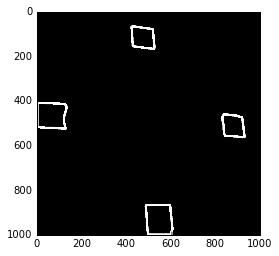

In [18]:
dartboard_detector = Dartboard_Detector()
GUI.imShow(IM_ROI)
IM_ROI_thres_color,IM_ROI_thres_color_closed,contours_structure = dartboard_detector.getOrientation(IM_ROI,IM_ROI_board)
GUI.imShow(Image_Tools.debugContours(IM_ROI_thres_color,contours_structure))

cv2.imwrite("./images/shape.png",IM_ROI_green)

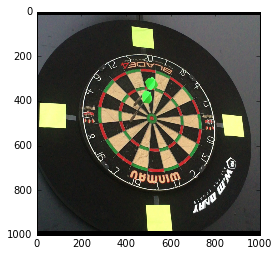

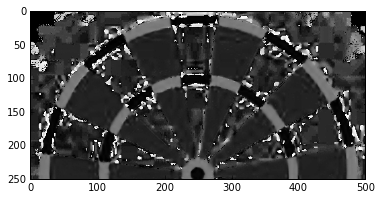

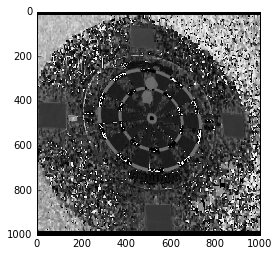

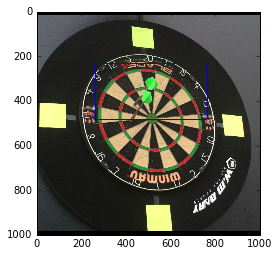

In [30]:
dartboard_detector = Dartboard_Detector()
GUI.imShow(IM_ROI)
a, shape_top = Image_Tools.readImage('./images/shape_top.png')
shape_top_hsv = cv2.cvtColor(a, cv2.COLOR_BGR2HSV)
GUI.imShow(shape_top_hsv[:,:,0])
IM_ROI_hsv = cv2.cvtColor(IM_ROI, cv2.COLOR_BGR2HSV)
GUI.imShow(IM_ROI_hsv[:,:,0])

res = cv2.matchTemplate(IM_ROI_hsv,shape_top_hsv,cv2.TM_CCORR_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_top_left = max_loc
w = shape_top.shape[1]
h = shape_top.shape[0]

IM_ROI_copy = IM_ROI.copy()
bottom_right = (top_top_left[0] + w, top_top_left[1] + h)
cv2.rectangle(IM_ROI_copy,top_top_left, bottom_right, 255, 2)
GUI.imShow(IM_ROI_copy)

(261, 234)


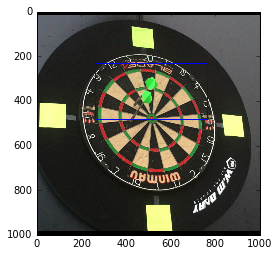

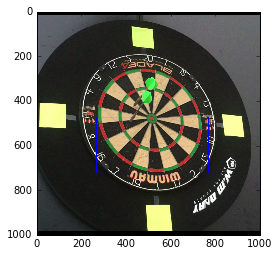

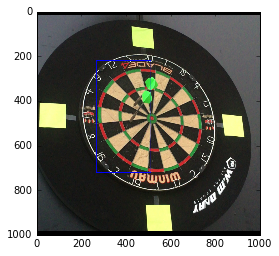

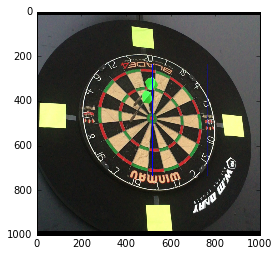

In [68]:
dartboard_detector = Dartboard_Detector()

top_top_left,bottom_top_left,left_top_left,right_top_left,top,bottom,left,right = dartboard_detector.getOrientationCorr(IM_ROI,"./darty/")
IM_ROI_copy = IM_ROI.copy()
print(top_top_left)
w = shape_t.shape[1]
h = shape_t.shape[0]
bottom_right = (top_top_left[0] + w, top_top_left[1] + h)
cv2.rectangle(IM_ROI_copy,top_top_left, bottom_right, 255, 2)
GUI.imShow(IM_ROI_copy)

w = shape_b.shape[1]
h = shape_b.shape[0]
IM_ROI_copy = IM_ROI.copy()
bottom_right = (bottom_top_left[0] + w, bottom_top_left[1] + h)
cv2.rectangle(IM_ROI_copy,bottom_top_left, bottom_right, 255, 2)
GUI.imShow(IM_ROI_copy)

w = shape_l.shape[1]
h = shape_l.shape[0]
IM_ROI_copy = IM_ROI.copy()
bottom_right = (left_top_left[0] + w, left_top_left[1] + h)
cv2.rectangle(IM_ROI_copy,left_top_left, bottom_right, 255, 2)
GUI.imShow(IM_ROI_copy)

w = shape_r.shape[1]
h = shape_r.shape[0]
IM_ROI_copy = IM_ROI.copy()
bottom_right = (right_top_left[0] + w, right_top_left[1] + h)
cv2.rectangle(IM_ROI_copy,right_top_left, bottom_right, 255, 2)
GUI.imShow(IM_ROI_copy)

In [75]:
import darty.image_tools
reload(darty.image_tools)
from darty.image_tools import Image_Tools
import darty.gui
reload(darty.gui)
from darty.gui import GUI
import darty.dartboard_detector
reload(darty.dartboard_detector)
from darty.dartboard_detector import Dartboard_Detector
import darty.difference_detector
reload(darty.difference_detector)
from darty.difference_detector import Difference_Detector
import darty.arrow_detector
reload(darty.arrow_detector)
from darty.arrow_detector import Arrow_Detector
import darty.dartboard
reload(darty.dartboard)
from darty.dartboard import Dartboard

3.1.0


In [331]:
dartboard = Dartboard()
M, src_points = dartboard.computePerspectiveTransformation(contours_structure,IM_ROI_grey,IM_ROI_red)

In [79]:
dartboard = Dartboard()
M, src_points = dartboard.computePerspectiveTransformationPts((top,bottom,left,right),IM_ROI_grey,IM_ROI_red)

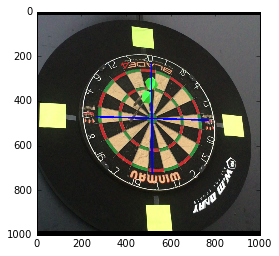

In [80]:
px,py = Image_Tools.getIntersection(src_points)
IM_ROI_bull = Image_Tools.debugIntersection(IM_ROI,src_points)
GUI.imShow(IM_ROI_bull)

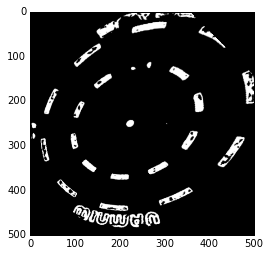

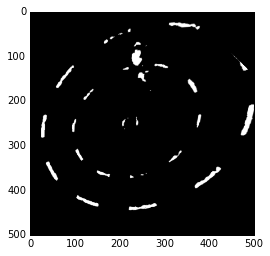

In [81]:
dartboard = Dartboard()
IM_RED_NORMAL,IM_ROI_RED_NORMAL = dartboard.warpWithRotation(IM_ROI_red,M)
GUI.imShow(IM_RED_NORMAL)
IM_RED_NORMAL,IM_ROI_RED_NORMAL = dartboard.warpWithRotation(IM_ROI_green,M)
GUI.imShow(IM_RED_NORMAL)

In [336]:
arrow_detector = Arrow_Detector()
IM_ROI2_grey_with_apex = arrow_detector.markApex(IM_ROI2_grey,arrow_x1,arrow_y1)

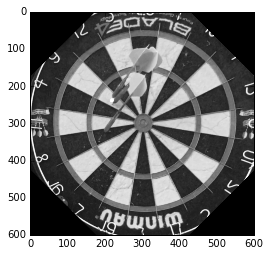

In [337]:
dartboard = Dartboard()
IM_ROI_ROTATED,IM_ROI_NORMAL = dartboard.warpWithRotation(IM_ROI2_grey_with_apex,M_corrected)
GUI.imShow(IM_ROI_ROTATED)

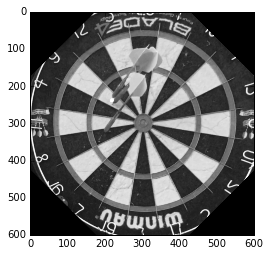

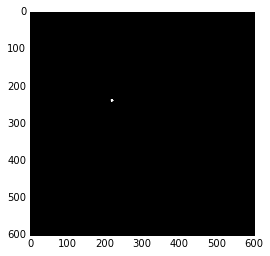

307.092837297
102.800778207


In [338]:
arrow_detector = Arrow_Detector()
GUI.imShow(IM_ROI_ROTATED)
cx,cy,angle,length,cross,IM_dot,IM_line = arrow_detector.getMetricOfArrow(IM_ROI_ROTATED)
GUI.imShow(IM_dot)
print(angle)
print(length)

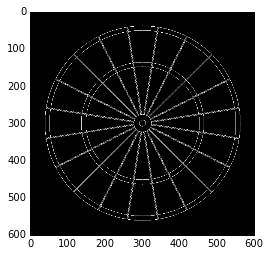

In [339]:
dartboard = Dartboard()
IM_dartboard, IM_mask = dartboard.drawDartboard()
GUI.imShow(IM_dartboard)

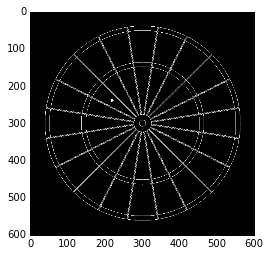

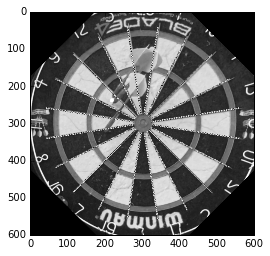

In [340]:
dartboard = Dartboard()
IM_final1, IM_final2 = dartboard.drawFinalDartboard(IM_dartboard,IM_dot,IM_ROI_ROTATED)
GUI.imShow(IM_final1)
GUI.imShow(IM_final2)

In [341]:
score = dartboard.calcScore(angle,length)
print(score)

9


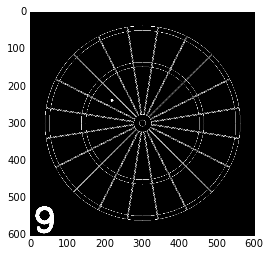

In [342]:
dartboard = Dartboard()
IM_score = dartboard.drawScore(IM_final1,score)
GUI.imShow(IM_score)

# ECC Transform

In [484]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)

print(len(good))
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
#matchesMask = mask.ravel().tolist()

h,w = edges.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
#print(edges.shape)

edges2 = cv2.warpPerspective(edges,M,(target_dim[1],target_dim[1]))
show(edges2)
edges2 = cv2.polylines(edges2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
show(edges2)

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(edges,kp1,IM_dartboard,kp2,good,None,**draw_params)
show(img3)
#out = cv2.warpPerspective(edges,M,(target_dim[1],target_dim[1]))
#show(out)
#img3 = np.array(IM_dartboard.shape,"uint8")
#img3 = cv2.drawMatchesKnn(IM_dartboard,kp1,edges,kp2,good,img3)

0


error: D:\Build\OpenCV\opencv-3.1.0\modules\calib3d\src\ptsetreg.cpp:180: error: (-215) count >= 0 && count2 == count in function cv::RANSACPointSetRegistrator::run


In [470]:
sift = cv2.xfeatures2d.SIFT_create()
#kp = sift.detect(edges,None)
#out = np.array(edges.shape)
#out = cv2.drawKeypoints(edges,kp,out)
#show(out)

#kp = sift.detect(IM_dartboard,None)
#out = np.array(IM_dartboard.shape)
#out = cv2.drawKeypoints(IM_dartboard,kp,out)
#show(out)

kp1, des1 = sift.detectAndCompute(edges,None)
kp2, des2 = sift.detectAndCompute(IM_dartboard,None)

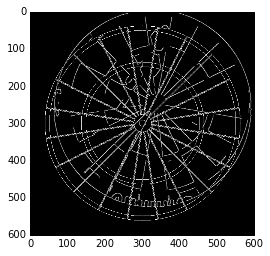

In [483]:
# Find size of image1
sz = IM_dartboard.shape
 
# Define the motion model
#warp_mode = cv2.MOTION_TRANSLATION
warp_mode = cv2.MOTION_AFFINE
 
# Define 2x3 or 3x3 matrices and initialize the matrix to identity
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    warp_matrix = np.eye(3, 3, dtype=np.float32)
else :
    warp_matrix = np.eye(2, 3, dtype=np.float32)
    
number_of_iterations = 1000;
 
# Specify the threshold of the increment
# in the correlation coefficient between two iterations
termination_eps = 1e-10;
 
# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)
 
    
# Run the ECC algorithm. The results are stored in warp_matrix.
(cc, warp_matrix) = cv2.findTransformECC (edges,IM_dartboard,warp_matrix, warp_mode, criteria)
 
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    # Use warpPerspective for Homography 
    edges = cv2.warpPerspective (edges, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
else :
    # Use warpAffine for Translation, Euclidean and Affine
    edges = cv2.warpAffine(edges, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
 
# Show final results
diff = edges - IM_dartboard 
show(diff)